<a href="https://colab.research.google.com/github/msidikpr/neuromatch-compneuro-2022-project/blob/development/playground/Feature_Extraction_NM2022_Sfenj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

The job of this notebook is to:

* Load the preprocessed tracking data into a `master_df` DataFrame

* Add handcrafted features as columns to `master_df`

* Save the `master_df` so it can be used for later classification notebooks

## Style / naming guide / coding hints

* Axes in column labels such as 'X' and 'Y' are always capitalized: e.g. `left_ear_X`
* All coordinates are in cm, area in cm^2
* All angles are in degrees
* 0° is up / north in the video frame
* whenever extracting features, do sanity checks on them:
  * plot time course: are there weird discontinuities etc.?
* often, rounding values makes sense to reduce numerical errors (e.g. angles such as 34.999999° are biologically meaningless -> round to 35°

# Housekeeping

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc
import matplotlib.patches as mpatches

# Loading the data from Google Drive

In [ ]:
#Because we are using a Shared with me drive, we need to have a small workaround
#In your shared with me folder, right click on:
#NMA_2022_Sfenj_Group_1"
#And click "Make a shortcut", and have this shortcut within your own drive

#now we can mount our drive
from pickle import load
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
#Since you have mounted your drive, which includes this shortcut, you can now access the files within that shortcut:
master_df = pd.read_csv('/content/drive/MyDrive/NMA_2022_Sfenj_Group_1/master_df.csv')

#test by showing the head
master_df.head()

Mounted at /content/drive


Unnamed: 0  frame_num  session_num  mouse_id  annotations      nose_X  \
0           0          0            0         0            3  831.659204   
1           1          1            0         0            1  833.050439   
2           2          2            0         0            1  838.718976   
3           3          3            0         0            1  826.757507   
4           4          4            0         0            1  822.045709   

       nose_Y  left_ear_X  left_ear_Y  right_ear_X  right_ear_Y      neck_X  \
0  202.914433  805.659204  250.914433   775.659204   189.914433  780.659204   
1  201.895063  809.050439  251.895063   778.050439   193.895063  783.050439   
2  179.862692  816.718976  244.862692   776.718976   193.862692  787.718976   
3  175.148063  815.757507  235.148063   774.757507   187.148063  785.757507   
4  174.457936  812.045709  222.457936   768.045709   178.457936  779.045709   

       neck_Y  left_hip_X  left_hip_Y  right_hip_X  right_hip_Y  tailbase_X  \
0  225.914433  711.659204  278.914433   711.659204   192.914433  643.659204   
1  229.895063  723.050439  287.895063   717.050439   192.895063  644.050439   
2  225.862692  730.718976  286.862692   713.718976   196.862692  646.718976   
3  218.148063  743.757507  282.148063   711.757507   198.148063  644.757507   
4  211.457936  749.045709  278.457936   709.045709   194.457936  646.045709   

   tailbase_Y  
0  220.914433  
1  227.895063  
2  233.862692  
3  237.148063  
4  233.457936

## Conversion to cm 
The tracking data is provided in "pixel" units, to convert into Centimeters units, all coordinates need to be divided by 37.7

In [ ]:
## converts dataframe into units of cm
## uses conversion of 37.7 pixels/cm
x = master_df.columns.tolist()
x= x[5:]
master_df[x]= master_df[x]/37.7

# Adding features

#### Postion centroids

Centroids are calculated by taking the mean of the individual coordinates.

In [ ]:
#Now we can calculate features in the master_df
#re-create indexing variables from when master_df was initially created
master_dict = {'frame_num':[], 'session_num': [], 'mouse_id': [], 'annotations':[]}
pos_x_names = ['nose_X', 'left_ear_X', 'right_ear_X','neck_X', 'left_hip_X', 'right_hip_X', 'tailbase_X'] 
pos_y_names = ['nose_Y', 'left_ear_Y', 'right_ear_Y','neck_Y', 'left_hip_Y', 'right_hip_Y', 'tailbase_Y']

# get average of all XY positions for centroid location
#calcuate the mean of all x's and y's (centroid of all 7 pts)
master_df['centroid_X'] = master_df[pos_x_names].mean(axis=1) 
master_df['centroid_Y'] = master_df[pos_y_names].mean(axis=1)

master_df['centroid_head_X'] = master_df[['nose_X', 'left_ear_X', 'right_ear_X','neck_X']].mean(axis=1)
master_df['centroid_head_Y'] = master_df[['nose_Y', 'left_ear_Y', 'right_ear_Y','neck_Y']].mean(axis=1)
master_df['centroid_body_X'] = master_df[['left_hip_X', 'right_hip_X', 'tailbase_X']].mean(axis=1)
master_df['centroid_body_Y'] = master_df[['left_hip_Y', 'right_hip_Y', 'tailbase_Y']].mean(axis=1)

master_df.head()





Unnamed: 0  frame_num  session_num  mouse_id  annotations     nose_X  \
0           0          0            0         0            3  22.059926   
1           1          1            0         0            1  22.096829   
2           2          2            0         0            1  22.247188   
3           3          3            0         0            1  21.929907   
4           4          4            0         0            1  21.804926   

     nose_Y  left_ear_X  left_ear_Y  right_ear_X  ...  right_hip_X  \
0  5.382346   21.370271    6.655555    20.574515  ...    18.876902   
1  5.355307   21.460224    6.681567    20.637943  ...    19.019906   
2  4.770894   21.663633    6.495032    20.602625  ...    18.931538   
3  4.645837   21.638130    6.237349    20.550597  ...    18.879509   
4  4.627531   21.539674    5.900741    20.372565  ...    18.807578   

   right_hip_Y  tailbase_X  tailbase_Y  centroid_X  centroid_Y  \
0     5.117094   17.073188    5.859799   19.934121    5.920428   
1     5.116580   17.083566    6.044962   20.035442    6.010858   
2     5.221822   17.154349    6.203254   20.125172    5.919056   
3     5.255917   17.102321    6.290400   20.095879    5.809157   
4     5.158035   17.136491    6.192518   20.027738    5.658225   

   centroid_head_X  centroid_head_Y  centroid_body_X  centroid_body_Y  
0        21.177963         5.766961        18.275664         6.125051  
1        21.241391         5.819498        18.427509         6.266005  
2        21.351962         5.599806        18.489451         6.344722  
3        21.240252         5.408437        18.570049         6.343450  
4        21.095377         5.217717        18.604219         6.245569  

[5 rows x 25 columns]

## Unstable / Playground below

# Speed and accelaration

In [9]:
## Speed function
def speed_calc(x,y,framerate):
  speed = np.sqrt(x**2+y**2)*framerate
  return speed

In [11]:
from numpy.ma.core import append
# for loops to get each session each mouse
# #### IMPROVEMENT ########
# use np.diff pre-pad function: 
# ####################
framerate = 30 
# variables used to record the calculation for the whole data frame
rec_spd_centr_head = []
rec_spd_centr_hip = []
rec_spd_centr_all = []
rec_acc_centr_head = [] # cm/s^2
rec_acc_centr_hip = []
rec_acc_centr_all = []

for ses in master_df['session_num'].unique():
  session =  master_df[master_df['session_num'] == ses]
  for ani in session['mouse_id'].unique():
    animal = session[session['mouse_id'] == ani]
    # head centroid
    x_diff = np.diff( animal['centroid_head_X'] )
    y_diff = np.diff( animal['centroid_head_Y'] )    
    tmp_X = np.hstack((np.nan,  x_diff) ).T
    tmp_Y = np.hstack((np.nan,  y_diff) ).T    
    tmp_spd = speed_calc(tmp_X,tmp_Y,framerate) # speed within a session an animal  
    rec_spd_centr_head = np.append(rec_spd_centr_head, tmp_spd)
    # accelaration: diff(speed)
    tmp_acc = ( np.hstack((np.nan, np.diff(tmp_spd))).T)/(1/framerate) # cm/s^2
    rec_acc_centr_head = np.append(rec_acc_centr_head, tmp_acc)

    # hip centroid
    x_diff = np.diff( animal['centroid_body_X'] )
    y_diff = np.diff( animal['centroid_body_Y'] )
    tmp_X = np.hstack((np.nan,  x_diff) ).T
    tmp_Y = np.hstack((np.nan,  y_diff) ).T    
    tmp_spd = speed_calc(tmp_X,tmp_Y,framerate)  
    rec_spd_centr_hip = np.append(rec_spd_centr_hip, tmp_spd)
    tmp_acc = (np.hstack((np.nan, np.diff(tmp_spd))).T)/(1/framerate)
    rec_acc_centr_hip = np.append(rec_acc_centr_hip, tmp_acc)

    # all parts centroid
    x_diff = np.diff( animal['centroid_X'] )
    y_diff = np.diff( animal['centroid_Y'] )
    tmp_X = np.hstack((np.nan,  x_diff) ).T
    tmp_Y = np.hstack((np.nan,  y_diff) ).T    
    tmp_spd = speed_calc(tmp_X,tmp_Y,framerate)  
    rec_spd_centr_all = np.append(rec_spd_centr_all, tmp_spd)
    tmp_acc = (np.hstack((np.nan, np.diff(tmp_spd))).T)/(1/framerate)
    rec_acc_centr_all = np.append(rec_acc_centr_all, tmp_acc)


    
# append centroid speeds (3 variables) to the master_df
master_df['spd_head_centroid'] = rec_spd_centr_head
master_df['spd_body_centroid'] = rec_spd_centr_hip
master_df['spd_centroid'] = rec_spd_centr_all

# append centroid speeds (3 variables) to the master_df
master_df['acc_head_centroid'] = rec_acc_centr_head
master_df['acc_body_centroid'] = rec_acc_centr_hip
master_df['acc_centroid'] =      rec_acc_centr_all

In [13]:
master_df.head()

Unnamed: 0  frame_num  session_num  mouse_id  annotations     nose_X  \
0           0          0            0         0            3  22.059926   
1           1          1            0         0            1  22.096829   
2           2          2            0         0            1  22.247188   
3           3          3            0         0            1  21.929907   
4           4          4            0         0            1  21.804926   

     nose_Y  left_ear_X  left_ear_Y  right_ear_X  ...  centroid_head_X  \
0  5.382346   21.370271    6.655555    20.574515  ...        21.177963   
1  5.355307   21.460224    6.681567    20.637943  ...        21.241391   
2  4.770894   21.663633    6.495032    20.602625  ...        21.351962   
3  4.645837   21.638130    6.237349    20.550597  ...        21.240252   
4  4.627531   21.539674    5.900741    20.372565  ...        21.095377   

   centroid_head_Y  centroid_body_X  centroid_body_Y  spd_head_centroid  \
0         5.766961        18.275664         6.125051                NaN   
1         5.819498        18.427509         6.266005           2.470806   
2         5.599806        18.489451         6.344722           7.378437   
3         5.408437        18.570049         6.343450           6.647651   
4         5.217717        18.604219         6.245569           7.185160   

   spd_body_centroid  spd_centroid  acc_head_centroid  acc_body_centroid  \
0                NaN           NaN                NaN                NaN   
1           6.215506      4.074207                NaN                NaN   
2           3.004966      3.851131         147.228931         -96.316187   
3           2.418231      3.412081         -21.923601         -17.602061   
4           3.110226      4.968029          16.125266          20.759847   

   acc_centroid  
0           NaN  
1           NaN  
2     -6.692275  
3    -13.171507  
4     46.678465  

[5 rows x 31 columns]

### Area

In [ ]:
## calculation to get area of head, can use the same to get area of body, order of points matters when creating the polygon, order below needs to be fixed!!
from shapely.geometry import Polygon
poly_area_head =[]
for x in range(0,len(master_df['frame_num'])):
  poly = Polygon([(master_df.nose_X.iloc[x], master_df.nose_Y.iloc[x]), (master_df.left_ear_X.iloc[x], master_df.left_ear_Y.iloc[x]), (master_df.right_ear_X.iloc[x], master_df.right_ear_Y.iloc[x]),(master_df.neck_X.iloc[x], master_df.neck_Y.iloc[x])])
  poly_area_head.append(poly.area)
master_df["poly_area_head"] = poly_area_head

In [ ]:
master_df.head()

Unnamed: 0  frame_num  session_num  mouse_id  annotations      nose_X  \
0           0          0            0         0            3  831.659204   
1           1          1            0         0            1  833.050439   
2           2          2            0         0            1  838.718976   
3           3          3            0         0            1  826.757507   
4           4          4            0         0            1  822.045709   

       nose_Y  left_ear_X  left_ear_Y  right_ear_X  ...  centroid_X  \
0  202.914433  805.659204  250.914433   775.659204  ...  751.516347   
1  201.895063  809.050439  251.895063   778.050439  ...  755.336154   
2  179.862692  816.718976  244.862692   776.718976  ...  758.718976   
3  175.148063  815.757507  235.148063   774.757507  ...  757.614650   
4  174.457936  812.045709  222.457936   768.045709  ...  755.045709   

   centroid_Y  head_centroid_x  head_centroid_y  body_centroid_x  \
0  223.200147       798.409204       217.414433       711.909204   
1  226.609349       800.800439       219.395063       716.800439   
2  223.148406       804.968976       211.112692       719.718976   
3  219.005206       800.757507       203.898063       721.507507   
4  213.315079       795.295709       196.707936       720.795709   

   body_centroid_y  body_centroid_X  body_centroid_Y  head_centroid_X  \
0       229.664433       711.909204       229.664433       798.409204   
1       234.645063       716.800439       234.645063       800.800439   
2       235.862692       719.718976       235.862692       804.968976   
3       233.898063       721.507507       233.898063       800.757507   
4       229.457936       720.795709       229.457936       795.295709   

   head_centroid_Y  
0       217.414433  
1       219.395063  
2       211.112692  
3       203.898063  
4       196.707936  

[5 rows x 29 columns]

### Head angle

$cos(\alpha) = \frac{\bar{a}\cdot\bar{b}}{|a||b|}$ 

In [ ]:
# head angle calcullation
vec_neck_tailbase = np.array((master_df['neck_X'] - master_df['tailbase_X'], master_df['neck_Y'] - master_df['tailbase_Y'])).T
vec_nose_neck = np.array((master_df['nose_X'] - master_df['neck_X'], master_df['nose_Y'] - master_df['neck_Y'])).T
dummy1 = np.array(np.linalg.norm(vec_neck_tailbase, axis=1)*np.linalg.norm(vec_nose_neck, axis=1))
dummy2 = np.zeros(len(vec_neck_tailbase))
len(vec_neck_tailbase)
for i in range(len(vec_neck_tailbase)):
  dummy2[i] = np.dot(vec_neck_tailbase[i],vec_nose_neck[i])
angle_head_body = np.degrees(np.arccos(dummy2/dummy1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


In [ ]:
angle_head_body.shape

(996194,)

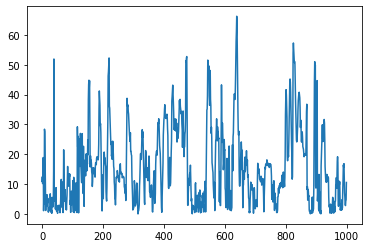

In [ ]:
plt.plot(angle_head_body[10000:11000])

In [ ]:
np.degrees(2*np.pi)

360.0

In [ ]:
tail_neck_vec_x = master_df['neck_X'] - master_df['tailbase_X']
tail_neck_vec_y = master_df['neck_Y'] - master_df['tailbase_Y']

neck_nose_vec_x = master_df['nose_X'] - master_df['neck_X']
neck_nose_vec_y = master_df['nose_Y'] - master_df['neck_Y']

In [ ]:
tail_neck_vec_y.describe()

count    996193.000000
mean          3.820024
std          79.079291
min        -253.000000
25%         -60.000000
50%           5.000000
75%          69.000000
max         247.000000
dtype: float64

In [ ]:
sp = (tail_neck_vec_x * neck_nose_vec_x) + (tail_neck_vec_y * neck_nose_vec_y)

In [ ]:
direction_cosines = sp / (np.sqrt(tail_neck_vec_x**2 + tail_neck_vec_y**2) * np.sqrt(neck_nose_vec_x**2 + neck_nose_vec_y**2))

In [ ]:
direction_cosines.describe()

count    996193.000000
mean          0.844296
std           0.260033
min          -1.000000
25%           0.816205
50%           0.942116
75%           0.988165
max           1.000000
dtype: float64

In [ ]:
head_angle = np.arccos(direction_cosines)*180/(np.pi)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
head_angle.describe()

count    996128.000000
mean         25.537555
std          23.367300
min           0.000000
25%           8.826063
50%          19.591011
75%          35.293369
max         180.000000
dtype: float64

In [ ]:
## 
tail_neck_vec_x = master_df['neck_X'] - master_df['tailbase_X']
tail_neck_vec_y = master_df['neck_Y'] - master_df['tailbase_Y']

neck_nose_vec_x = master_df['nose_X'] - master_df['neck_X']
neck_nose_vec_y = master_df['nose_Y'] - master_df['neck_Y']

sp = (tail_neck_vec_x * neck_nose_vec_x) + (tail_neck_vec_y * neck_nose_vec_y)
direction_cosines = sp / (np.sqrt(tail_neck_vec_x**2 + tail_neck_vec_y**2) * np.sqrt(neck_nose_vec_x**2 + neck_nose_vec_y**2))
head_angle = np.arccos(direction_cosines)*180/(np.pi)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
direction_cosines.describe()

count    996193.000000
mean          0.844296
std           0.260033
min          -1.000000
25%           0.816205
50%           0.942116
75%           0.988165
max           1.000000
dtype: float64

(array([465301., 289854., 139466.,  58554.,  22768.,   8921.,   4459.,
          2595.,   2018.,   2192.]),
 array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.]),
 <a list of 10 Patch objects>)

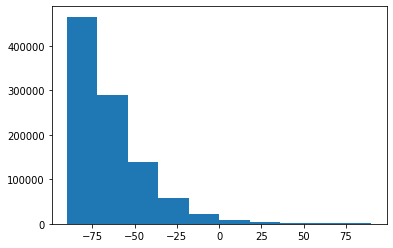

In [ ]:
plt.hist(head_angle)